DSC 550 Data Mining
Week 2 Assignment - Graph Analysis with Matplotlib


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

I will be using a housing dataset for making my analysis for this assignment. I hope to use some of the linear regression concepts I learnt from my previous semesters and put it to practice!

In [8]:
df = pd.read_csv('https://github.com/rajukan/DSC-550/blob/main/assignments/assignments-data/house_dataset.csv?raw=true')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished




First Row: Has 4 bedrooms, 2 bathrooms, 3 stories, situated at main road, has no guestroom and basement. Doesn't have water heating facility, comes with 2 parking area / slots.

Type: Furnished

Second Row: Has 4 bedrooms, 4 bathrooms, 4 stories, situated at main road, has no guestroom and basement. Doesn't have water heating facility, comes with 3 parking area / slots.

Type: Furnished

Commonality

All 6 houses are situated at main road, no hotwaterheating


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB




Numerical Categories: Price, area, bedrooms,bathrooms,stories,parking

Categorical Categories: mainroad,guestroom,basement,hotwaterheating,airconditioning


In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Observation

About The Numbers

We have 545 data count
No Null Counts

Area

Assuming the measurement of the area is square feet (sqft)
On Average the sqft of the area is 5150 sqft
Minimum is 1650 sqft and maximum is 16200 sqft
Most of the houses fall 2760 sqft

Bedrooms

On Average, it's 2 bedrooms
Minimum of 1 bedrooms, maximum of 5 bedrooms
Median of the dataset contains 3 bedrooms
Most of the houses have 1 bedroom

Bathrooms

On Average, the dataset contains 1 bathroom
Every house have atleast one bathroom
25% - 50% of the dataset contains 1 bathroom which suggests that our dataset contains most houses with one bathroom
On occation of rarity, we can see 2 bathrooms

Stories

On Average, one storied building
Every house is atleast one storied building

Parking

Most of the house lacks parking space
1/3 houses has one parking space


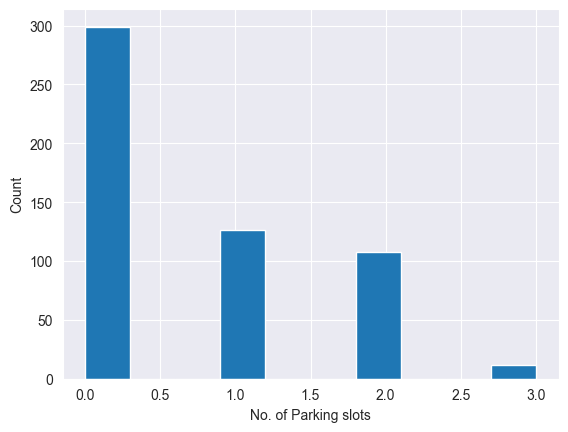

In [15]:
plt.hist(df['parking'])
plt.xlabel('No. of Parking slots')
plt.ylabel('Count')
plt.show()

Graph-1 Observation

Suprisingly, most of the houses doesn't have a parking slot
Around 135 houses have one parking slot
100 houses have 2 parking slots
20 houses have 3 parking slots


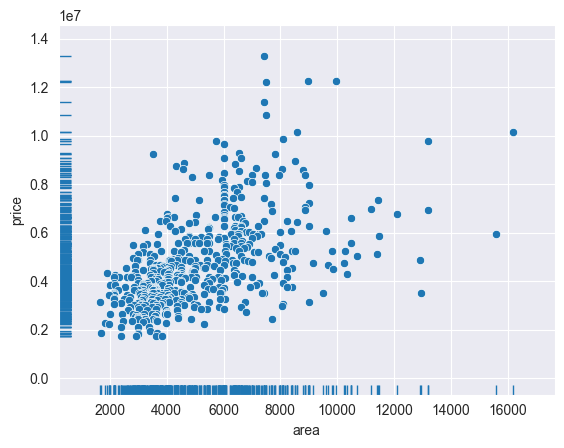

In [16]:
import seaborn as sns
sns.scatterplot(data=df, x="area", y="price")
sns.rugplot(data=df, x="area", y="price");

Graph-2 Observation:

The increase in area increases the price
Some houses with smaller sqft leans towards higher price
While some houses with larger sqft leans towards lesser price
The area around 1.0 - 5.0 (price) and 2200 - 5000 sqft are overcrowded and can be assumed that this range is the most selling point, since more houses are suited in this range and customers would lean towards purchasing houses within this range

Outliners or Considerable Data ?

We could consider datapoint such as a propertys in 7900 sqft costs 1.3 to 1.6 crores as considerable data.
These points, while on the higher end of the price range for their area, are not necessarily outliers because they fall within the general trend of increasing price with increasing area.
They are simply at the higher end of the distribution.


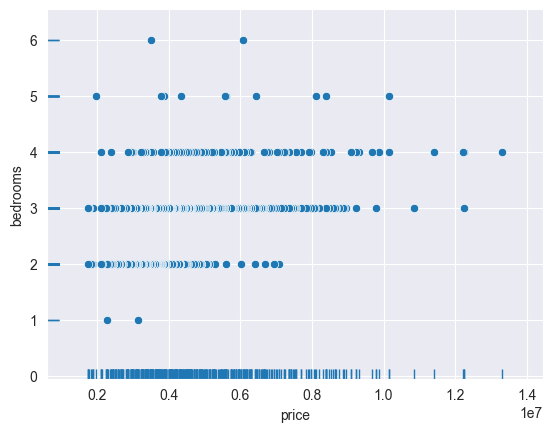

In [17]:
sns.scatterplot(data=df,x='price',y='bedrooms')
sns.rugplot(data=df,x='price',y='bedrooms');


Graph-3 Observation:

Densily populated houses are 3 bedroom houses
Followed by 4 bedroom houses
Then by 2 bedroom houses
Two 6 bedroom houses are outliners

Inference

Houses with 2 bedrooms are ranging from 1 crore to 5.7 crore
3 bedroom houses ranging from 1 crore to 9 crore
we can try similar approach for other features like bathrooms etc

In [41]:
standard_data = df[[ 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
'parking', 'prefarea', 'furnishingstatus']]

In [22]:
#Target Data
target_data = df['price']

In [23]:
#Without target data
df = df.drop('price',axis=1)

In [24]:
#To avoid data leakage, we shall split that data with features and target variable
#As for data leakage, you would want to separate your target variable before you scale or normalize. Doing so before separating would cause the information in your target to leak out and alter the results of the scaling/normalization. You want the results of your analysis to best represent the effect of the independent variables on the dependent variable and not the other way around. Hence the coefficient of determination. 

#New dataframe 
data = df

#Storing the features with categorical data
x = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#Mapping the values
for column in x:
    data[column] = data[column].map({'yes':1,'no':0})

In [25]:
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [26]:
#Categorical data except furnishingstatus is converted as numerical features
dummy_data = pd.get_dummies(data,columns=['furnishingstatus'],dtype=int)

In [27]:
#Dropping furnishingstatus_semi-furnished to avoid multicolinearnity
dummy_data = dummy_data.drop('furnishingstatus_semi-furnished',axis=1)

In [28]:
dummy_data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0


Converted the furnishingstatus to numerical feature and dropped one column to avoid multicollinearity

In [29]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   area                          545 non-null    int64
 1   bedrooms                      545 non-null    int64
 2   bathrooms                     545 non-null    int64
 3   stories                       545 non-null    int64
 4   mainroad                      545 non-null    int64
 5   guestroom                     545 non-null    int64
 6   basement                      545 non-null    int64
 7   hotwaterheating               545 non-null    int64
 8   airconditioning               545 non-null    int64
 9   parking                       545 non-null    int64
 10  prefarea                      545 non-null    int64
 11  furnishingstatus_furnished    545 non-null    int32
 12  furnishingstatus_unfurnished  545 non-null    int32
dtypes: int32(2), int64(11)
memory usage

In [30]:
dummy_data.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.326606
std,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.469402
min,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


Observation

Price and area has higher values while rest of the features are between 1-6
This could make the predictive model be lesser accurate
Thus, we need to standard encode it to have the values around the same

Standard Encoding v/s Min Max Encoding

Which one to apply for area ?

Standard Distribution: If the data is standard distribution and we don't want the model to pick the outliners, we can consider Stanadrd Encoding

Min Max Encoding: If one was to preserve the data distribution, shall as maintain the small and large values in dataset, we can use min-max encoding which encodes within [0,1]

Within 0 means smaller data

Above 0 means larger data


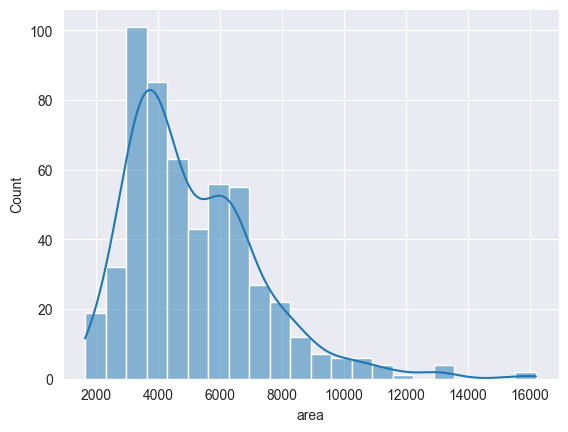

In [31]:
sns.histplot(data=df.area,kde=True);

In [32]:
#non standard features
non_standard_features = ['area']

#Importing the necessary dependancies
from sklearn.preprocessing import MinMaxScaler
sf = MinMaxScaler()

for features in non_standard_features:
    dummy_data[features] = sf.fit_transform(dummy_data[[features]])

standard_data = dummy_data

standard_data.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,0.396564,4,2,3,1,0,0,0,1,2,1,1,0
1,0.502405,4,4,4,1,0,0,0,1,3,0,1,0
2,0.571134,3,2,2,1,0,1,0,0,2,1,0,0
3,0.402062,4,2,2,1,0,1,0,1,3,1,1,0
4,0.396564,4,1,2,1,1,1,0,1,2,0,1,0


Observation

Encoded the features (Standard Encoding)
I have not performed the statistical analysis on features which were categorical before



In [33]:
standard_data.corr()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.082972
mainroad,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,-0.133123
guestroom,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,-0.099023
basement,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,-0.117935
hotwaterheating,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,-0.059194
airconditioning,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.094086
parking,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.131234,-0.165705


Higher Co-relation with Price

    Area has higher co-relation with price
        Bathroom has higher co-relation with price
        Stories have high co-relation with price

Lower Co-relation with Price

    Bedroom has lower co-relation with price
        Mainroad has co-relation lesser than bedroom with price
        Guestroom has co-relation lesser than mainroad with price
        Basement has co-relation lesser than Guestroom with price

Significant Analysis

Parking has higher linear relationship with price compared to Prefarea
furnishingstatus_unfurnished is prefectly non-linear and isn't co-related with price


In [34]:
#Statistical Analysis
#Mainroad
with_mainroad = standard_data[standard_data['mainroad']==1]['mainroad']
without_main_road = standard_data[standard_data['mainroad']==0]['mainroad']

#Guestroom
with_guest_room = standard_data[standard_data['guestroom']==1]['guestroom']
without_guest_room = standard_data[standard_data['guestroom']==0]['guestroom']

#WaterHeating
with_water_heating = standard_data[standard_data['hotwaterheating']==1]['hotwaterheating']
without_water_heating = standard_data[standard_data['hotwaterheating']==0]['hotwaterheating']

#AirConditioning
with_air_conditioning = standard_data[standard_data['airconditioning']==1]['airconditioning']
without_air_condtioning = standard_data[standard_data['airconditioning']==0]['airconditioning']

#Prefarea
with_pref_area =  standard_data[standard_data['prefarea']==1]['prefarea']
with_pref_area =  standard_data[standard_data['prefarea']==0]['prefarea']

#Reference
# x = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [35]:

#Helper Function
def student_ttest(x,y):
    stats,p_value = ttest_ind(x,y)
    return stats,p_value

def percentage_score(x, y, z):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Check for zero means to avoid divide by zero
    if y_mean == 0:
        print("Warning: y_mean is zero, leading to divide by zero issue.")
        return float('inf')  # Return infinity or handle as needed

    if z < 0.05:
        return ((x_mean - y_mean) / y_mean) * 100
    else:
        return ((x_mean - y_mean) / x_mean) * 100

In [36]:
from scipy.stats import ttest_ind

#Helper Function
def student_ttest(x,y):
    stats,p_value = ttest_ind(x,y)
    return stats,p_value

def percentage_score(x, y, z):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Check for zero means to avoid divide by zero
    if y_mean == 0:
        print("Warning: y_mean is zero, leading to divide by zero issue.")
        return float('inf')  # Return infinity or handle as needed

    if z < 0.05:
        return ((x_mean - y_mean) / y_mean) * 100
    else:
        return ((x_mean - y_mean) / x_mean) * 100

In [37]:
#H0:Guest rooms doesn't influences the house pricing

stats,pvalue = student_ttest(with_guest_room,without_guest_room)

percentagescore = percentage_score
if pvalue < 0.05:
    print('Houses with guest rooms are costlier')
else:
    print('Houses without guest rooms are cheaper')

Houses with guest rooms are costlier


C:\Users\gyanr\gyan-python-workspace\jup-workspace\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Linear Regression analysis. 

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x=standard_data
y=target_data
lr.fit(x,y)

LinearRegression()

In [39]:
lr.score(x,y)

0.6818018485540142

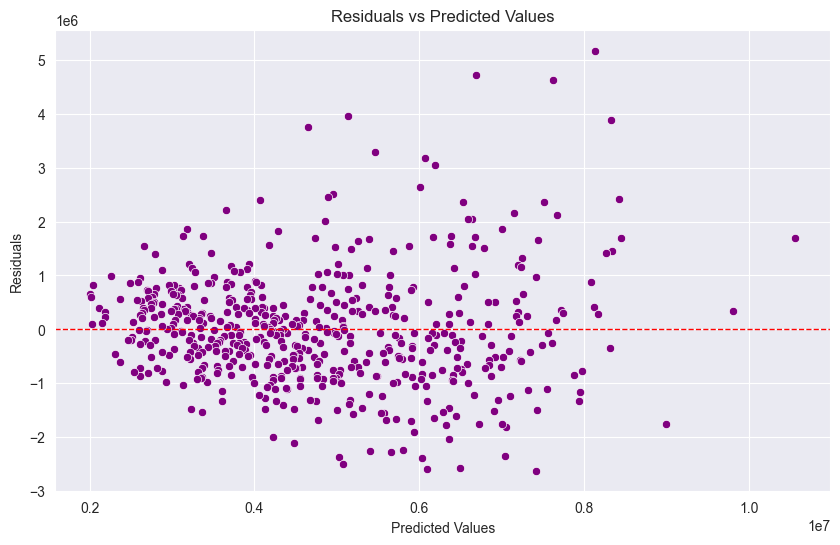

In [40]:
#Residual Analysis
#It's useful to get into the habit of performing residual analysis. That could provide some insight into the why the linear regression performed the way it did 
#Residual analysis is a good way of identifying problems like heteroscedasticity in one of your variables, which can impact the results of your regression.

y_pred_train = lr.predict(standard_data)

#cal residuals
residuals = target_data - y_pred_train

#residuals vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred_train,y=residuals,color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Graph-4 Observation:

No Obvious Curvature: There isn't a clear curved pattern in the residuals. This is good, as it suggests that the relationship between your features and the target variable is reasonably linear. If there were a distinct curve, it would indicate that a linear model isn't appropriate.

Possible Heteroscedasticity (Non-constant Variance): There's a slight suggestion of heteroscedasticity. The spread of the residuals seems to increase somewhat as the predicted values increase. This means that the variance of the errors is not constant across the range of predicted values. This is a common issue in regression analysis.

Some Outliers: There are a few points that are quite far from the horizontal zero line, especially some larger positive residuals. These could be considered outliers and might be influencing the model.

Summary:

For a regression model, these are the differences between the observed and predicted values. The residuals are plotted on the y-axis against the independent variable alone on the x-axis.

Residual = Observed – Predicted

Linearity: randomly scattered residuals around 0 indicate an appropriate linear model. If there are clear patterns, then the linear model is not appropriate.

Heteroscedasticity: residuals with a spread that fluctuates with x suggest non-constant variance.

Outliers: Residuals that have a considerable distance from 0 compared to others may be influenced by outliers.

Normality: For residuals to have valid statistical inference, they need to be roughly normally distributed.

Interpreting:

Good Fit – randomly scattered residuals around 0.

Bad Fit – clear patterns i.e. curves or expanding spread

Outliers – points that reside far from the majority